# Using ipython-sql

In [1]:
%load_ext sql

In [2]:
import os

host = "localhost"
database = "dataset"
user = 'postgres'
password = '=Yok843843'

connection_string = f"postgresql://{user}:{password}@{host}/{database}"

In [3]:
%sql $connection_string

'Connected: postgres@dataset'

# Using sqlalchemy

In [4]:
from sqlalchemy import create_engine, inspect

engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['startups',
 'ads_ctr_optimisation',
 'churn_modelling',
 'data',
 'mall_customers',
 'position_salaries',
 'salary_data',
 'social_network_ads',
 'wine']

# Import data

In [5]:
import pandas as pd

df = pd.read_sql('SELECT * FROM mall_customers', engine)

In [6]:
df

,customerid,genre,age,annual_income,spending_score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,196,Female,35.0,120.0,79.0
196,197,Female,45.0,126.0,28.0
197,198,Male,32.0,126.0,74.0
198,199,Male,32.0,137.0,18.0


In [7]:
X = df.iloc[:, [3,4]].values
X

array([[ 15.,  39.],
       [ 15.,  81.],
       [ 16.,   6.],
       [ 16.,  77.],
       [ 17.,  40.],
       [ 17.,  76.],
       [ 18.,   6.],
       [ 18.,  94.],
       [ 19.,   3.],
       [ 19.,  72.],
       [ 19.,  14.],
       [ 19.,  99.],
       [ 20.,  15.],
       [ 20.,  77.],
       [ 20.,  13.],
       [ 20.,  79.],
       [ 21.,  35.],
       [ 21.,  66.],
       [ 23.,  29.],
       [ 23.,  98.],
       [ 24.,  35.],
       [ 24.,  73.],
       [ 25.,   5.],
       [ 25.,  73.],
       [ 28.,  14.],
       [ 28.,  82.],
       [ 28.,  32.],
       [ 28.,  61.],
       [ 29.,  31.],
       [ 29.,  87.],
       [ 30.,   4.],
       [ 30.,  73.],
       [ 33.,   4.],
       [ 33.,  92.],
       [ 33.,  14.],
       [ 33.,  81.],
       [ 34.,  17.],
       [ 34.,  73.],
       [ 37.,  26.],
       [ 37.,  75.],
       [ 38.,  35.],
       [ 38.,  92.],
       [ 39.,  36.],
       [ 39.,  61.],
       [ 39.,  28.],
       [ 39.,  65.],
       [ 40.,  55.],
       [ 40.,

# Find the optimal number by using elbow method

C:\Users\wisaw\anaconda3\envs\sql\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


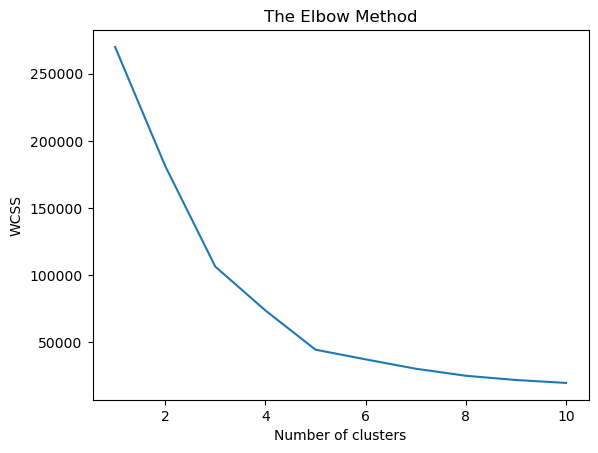

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Find the optimal number by using dendrogram method

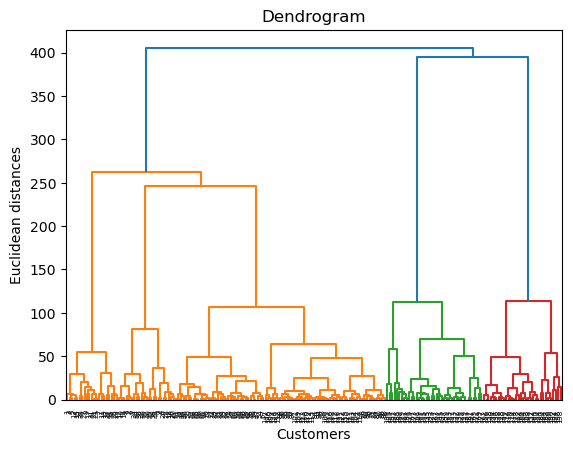

In [11]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Training the K-Means and Hierarchical model

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the cluster by K-Means

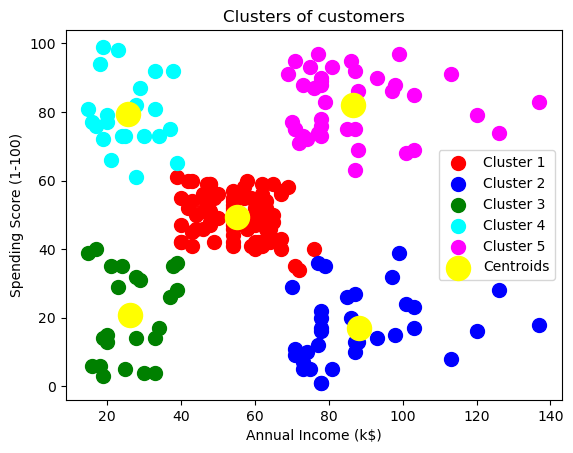

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualising the cluster by Hierarchical

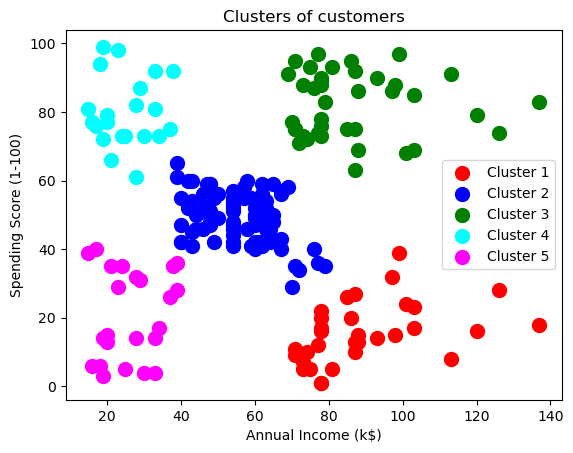

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()